In [13]:
%reset -f
from parflow import Run
from parflow.tools.fs import get_absolute_path
from parflow.tools.io import write_pfb, read_pfb
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.utils.data import TensorDataset

In [14]:
sat = np.load('../neurcomp/volumes/sat.npy')

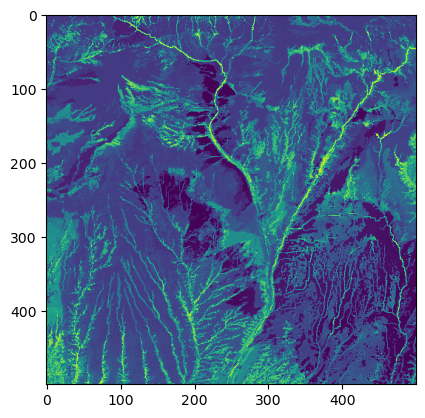

In [5]:
sat.shape
plt.imshow(sat[:,:,9])

In [22]:
satdata = torch.zeros(500*500*10,2)
value   = torch.zeros(500*500*10,1)
time    = torch.zeros(500*500*10,1)
npmin = np.min(sat)
npmax = np.max(sat)

count   = 0
for i in range(500):
    for j in range(500):
        for k in range(10):
            
            satv = (sat[i,j,k] - npmin)/(npmax- npmin)*2-1
            
            ii = (i-0)/499*2-1
            jj = (j-0)/499*2-1
            kk = (k-0)/9*2-1
            
            satdata[count,:] = torch.FloatTensor([ii,jj])
            value[count] = torch.FloatTensor([satv]).reshape(-1,1)
            time[count] = torch.FloatTensor([kk]).reshape(-1,1)
            
            count = count + 1

In [23]:
data_train = TensorDataset(satdata,value,time)
torch.save(data_train,'data_field.pth') 

In [24]:
count = 0
for x in data_train:#generator
    count = count + 1
    if count<50: 
        print(x)

(tensor([-1., -1.]), tensor([1.]), tensor([-1.]))
(tensor([-1., -1.]), tensor([-0.2832]), tensor([-0.7778]))
(tensor([-1., -1.]), tensor([-0.4661]), tensor([-0.5556]))
(tensor([-1., -1.]), tensor([-0.5064]), tensor([-0.3333]))
(tensor([-1., -1.]), tensor([-0.6470]), tensor([-0.1111]))
(tensor([-1., -1.]), tensor([0.6182]), tensor([0.1111]))
(tensor([-1., -1.]), tensor([-0.4486]), tensor([0.3333]))
(tensor([-1., -1.]), tensor([-0.5044]), tensor([0.5556]))
(tensor([-1., -1.]), tensor([-0.5838]), tensor([0.7778]))
(tensor([-1., -1.]), tensor([-0.6580]), tensor([1.]))
(tensor([-1.0000, -0.9960]), tensor([1.]), tensor([-1.]))
(tensor([-1.0000, -0.9960]), tensor([-0.6163]), tensor([-0.7778]))
(tensor([-1.0000, -0.9960]), tensor([-0.6728]), tensor([-0.5556]))
(tensor([-1.0000, -0.9960]), tensor([-0.7902]), tensor([-0.3333]))
(tensor([-1.0000, -0.9960]), tensor([-0.8189]), tensor([-0.1111]))
(tensor([-1.0000, -0.9960]), tensor([0.0918]), tensor([0.1111]))
(tensor([-1.0000, -0.9960]), tensor([-

In [7]:
gyre = np.load('../double_gyre/double_gyre_sobol_500.npy')
print(gyre.shape)

(513, 500, 3)
